In [1]:
from model.model import *
from processing_pipeline import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [4]:
dfs = pd.concat([preprocess(alldat, i) for i in range(39)])

In [5]:
train, test = train_test_split(dfs)

In [6]:
train.shape

(7814, 21)

In [7]:
set(test["session"])

{1, 4, 8, 12, 19, 22, 25, 30, 35}

In [8]:
df = train

In [178]:
# Define Mode
df['mode'] = 0

# Split Modes
less_25 = df['latency'] < .25
less_50 = df['latency'] <= .5
greater_25 = df['latency'] >= .25

# print(theiler_rew[less_25])
df['mode'][less_25] = 1
df['mode'][less_50 & greater_25] = 2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [247]:
import seaborn as sns

def create_histogram(df, measure='latency',feedback_type=1,split_fig=None,split_sub=None,split_plot='feedback_type',remove_nogo=True):
    if remove_nogo:
        df = df[df['trial_type'] != "E"]
    if feedback_type is -1 or 1:
        df = df[df['feedback_type'] == feedback_type]  
        if feedback_type == -1:
            appended_label = "No Reward Trials Only"
        else:
            appended_label = "Rewarded Trials Only"
            
    else:
        appended_label = "All"
    
    if split_fig is not None:
        split_fig_list = sorted(set(df[split_fig]))
    else:
        split_fig_list = ['collapse']
        
    if split_sub is not None:
        split_sub_list = sorted(set(df[split_sub]))
    else:
        split_sub_list = ['collapse']
        
    if split_plot is not None:
        split_plot_list = sorted(set(df[split_plot]))
    else:
        split_plot_list = ['collapse']
    
    
    fig_list = []
    sub_list = []
    plot_list = []
    
    for fig_ind,fig in enumerate(split_fig_list):
        plt.figure(fig_ind,figsize=(20,5));
        if fig is not 'collapse':
            df_fig = df[df[split_fig] == fig]
        else:
            df_fig = df
        for sub_ind,sub in enumerate(split_sub_list):
            plt.subplot(np.ceil(np.sqrt(len(split_sub_list))), np.ceil(np.sqrt(len(split_sub_list))), sub_ind+1)
            if sub is not 'collapse':
                df_sub = df_fig[df_fig[split_sub] == sub]
            else:
                df_sub = df_fig
#             sns.distplot(df_sub[measure], label='unseparated',hist_kws=dict(alpha=1),norm_hist = True)
            for plot_ind,plot in enumerate(split_plot_list):
                if plot is not 'collapse':
                    df_plot = df_sub[df_sub[split_plot]==plot]
                else:
                    df_plot = df_sub
                sns.distplot(df_plot[measure], label=split_plot + ' ' + str(plot_ind),norm_hist=True)
                plt.title(str(split_sub) + ' = ' + str(sub))#'Theiler at 75% Difficulty | Rewarded Trials Only')
            plt.legend()
            plt.xlim([0,1.5])
        plt.suptitle(str(fig),fontweight='bold', fontsize=16)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()

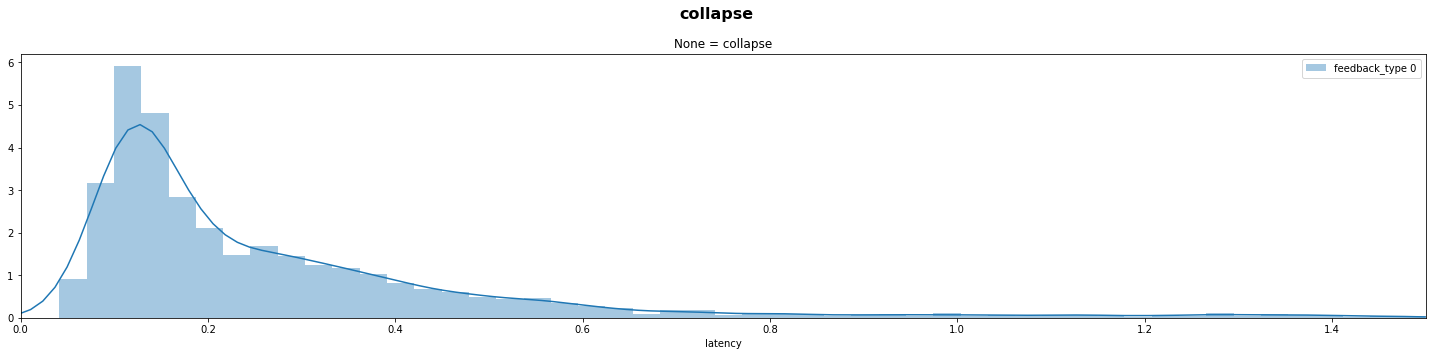

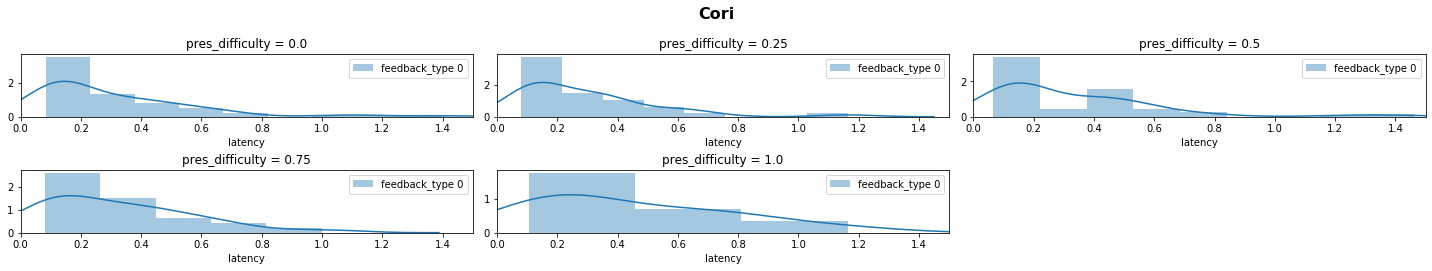

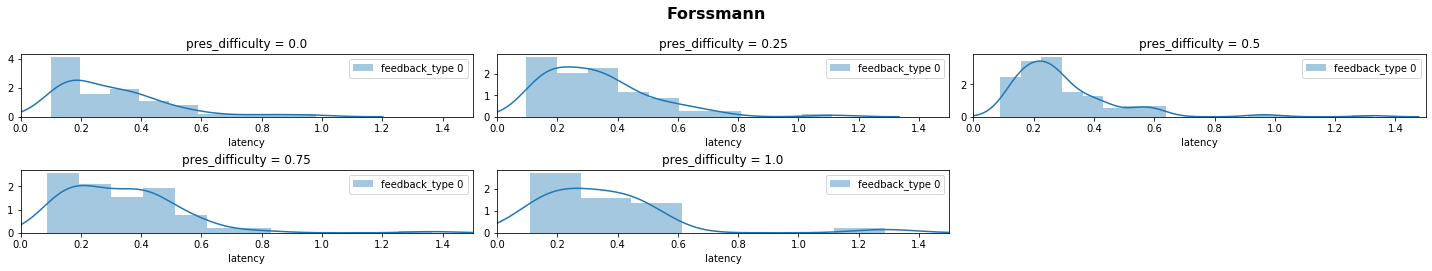

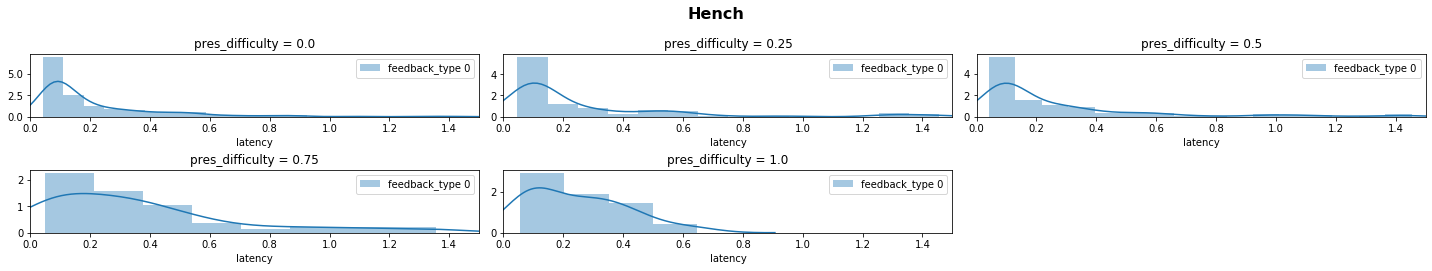

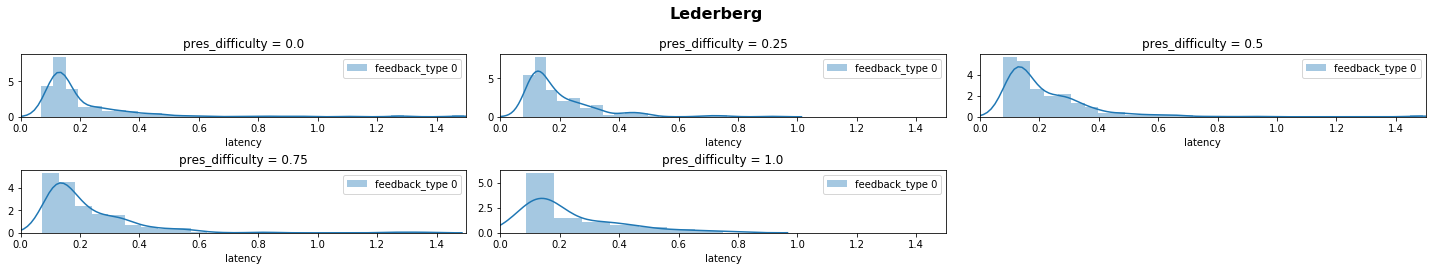

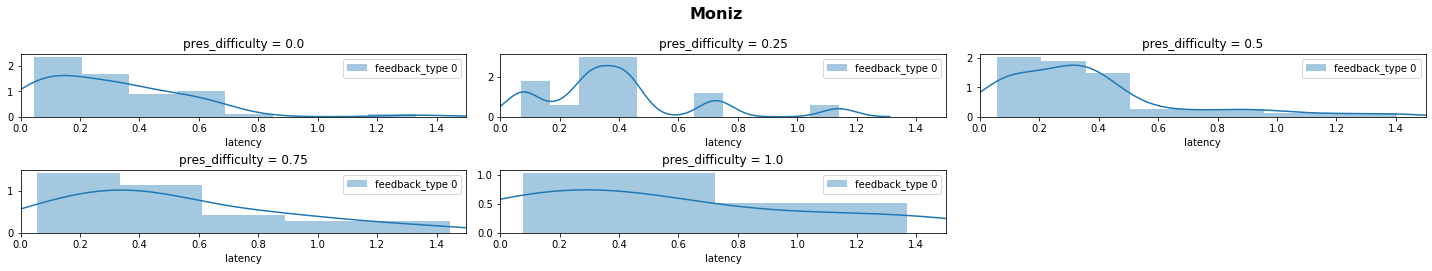

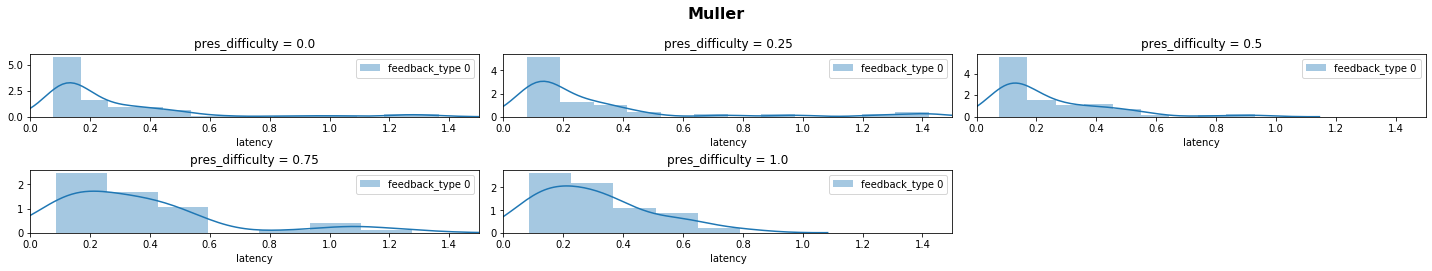

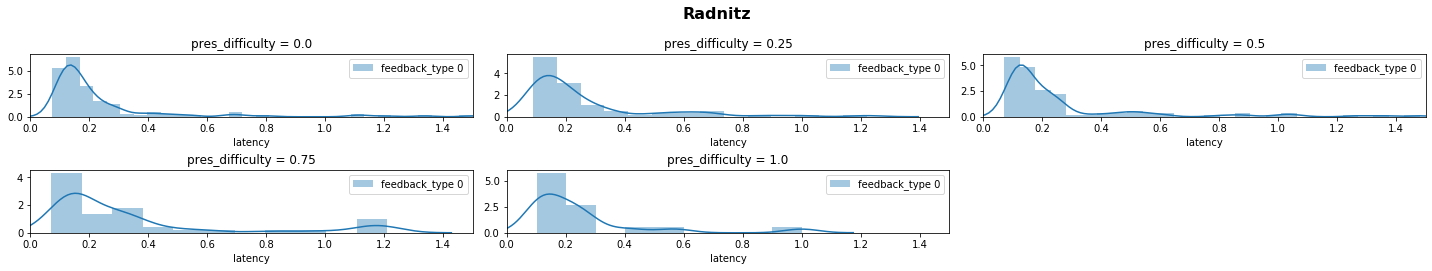

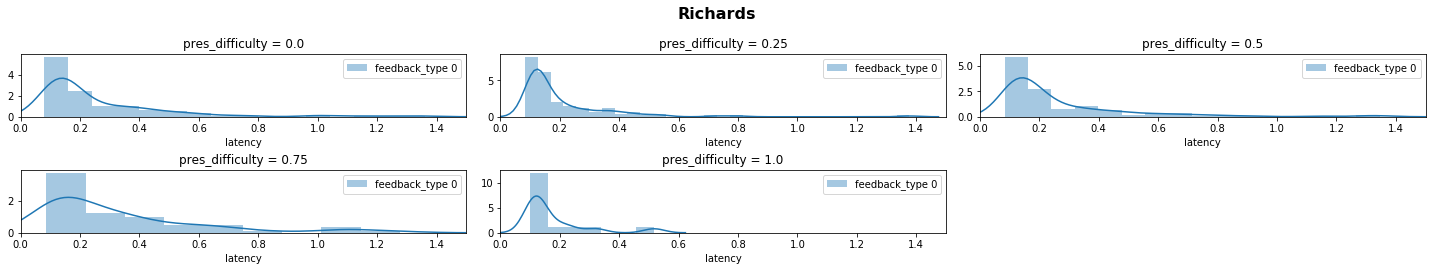

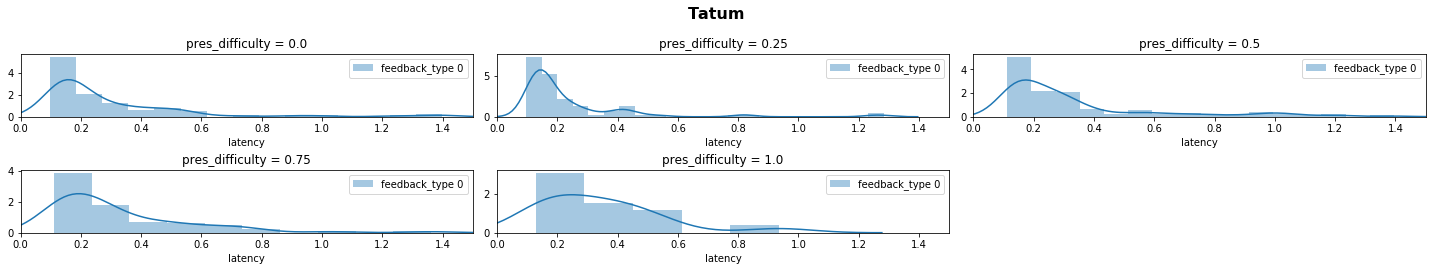

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


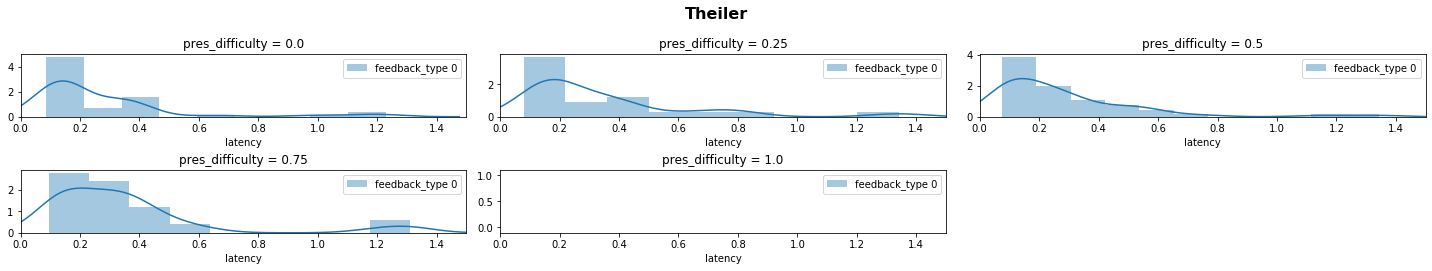

In [249]:
create_histogram(df)
create_histogram(df,feedback_type=1,split_fig='mouse_name',split_sub='pres_difficulty')
# create_histogram(df,split_plot='mode')

In [174]:
diff_100 = df_go[(df_go['pres_difficulty']) == 0]
df_go['pres_difficulty']

0      0.00
1      0.50
2      0.50
4      0.50
9      0.50
       ... 
338    0.25
339    0.25
340    0.25
341    0.25
342    0.25
Name: pres_difficulty, Length: 5691, dtype: float64

In [11]:
# Split into Rewarded or Not Without Regard to Difficulty
reward = df_go['feedback_type'] == 1
nope = df_go['feedback_type'] == -1

dfrew = df_go[reward]
dfnone = df_go[nope]

# Split Difficulty and Feedback Types
diff_100 = df_go[(df_go['pres_difficulty']) == 1]
diff_100_rew = diff_100[(diff_100['feedback_type'] == 1)]
diff_100_nope =diff_100[(diff_100['feedback_type'] == -1)]
diff_75 = df_go[(df_go['pres_difficulty'])  == .75]
diff_75_rew = diff_75[(diff_75['feedback_type'] == 1)]
diff_75_nope =diff_75[(diff_75['feedback_type'] == -1)]
diff_50 = df_go[(df_go['pres_difficulty'])  == .50]
diff_50_rew = diff_50[(diff_50['feedback_type'] == 1)]
diff_50_nope =diff_50[(diff_50['feedback_type'] == -1)]
diff_25 = df_go[(df_go['pres_difficulty'])  == .25]
diff_25_rew = diff_25[(diff_25['feedback_type'] == 1)]
diff_25_nope =diff_25[(diff_25['feedback_type'] == -1)]
diff_0 = df_go[(df_go['pres_difficulty'])  == 0]
diff_0_rew = diff_0[(diff_0['feedback_type'] == 1)]
diff_0_nope =diff_0[(diff_0['feedback_type'] == -1)]

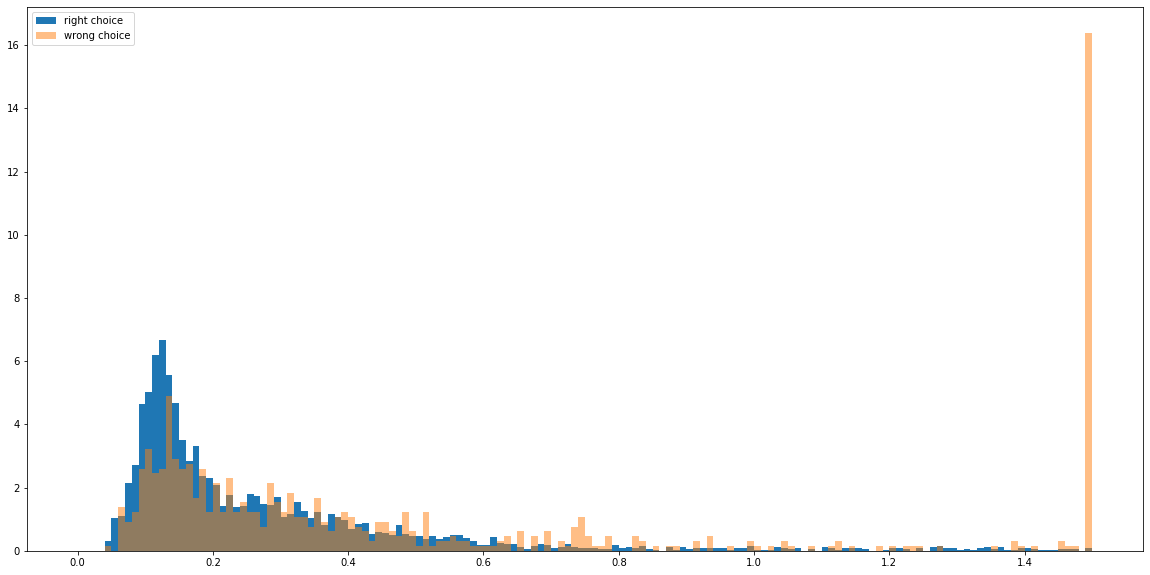

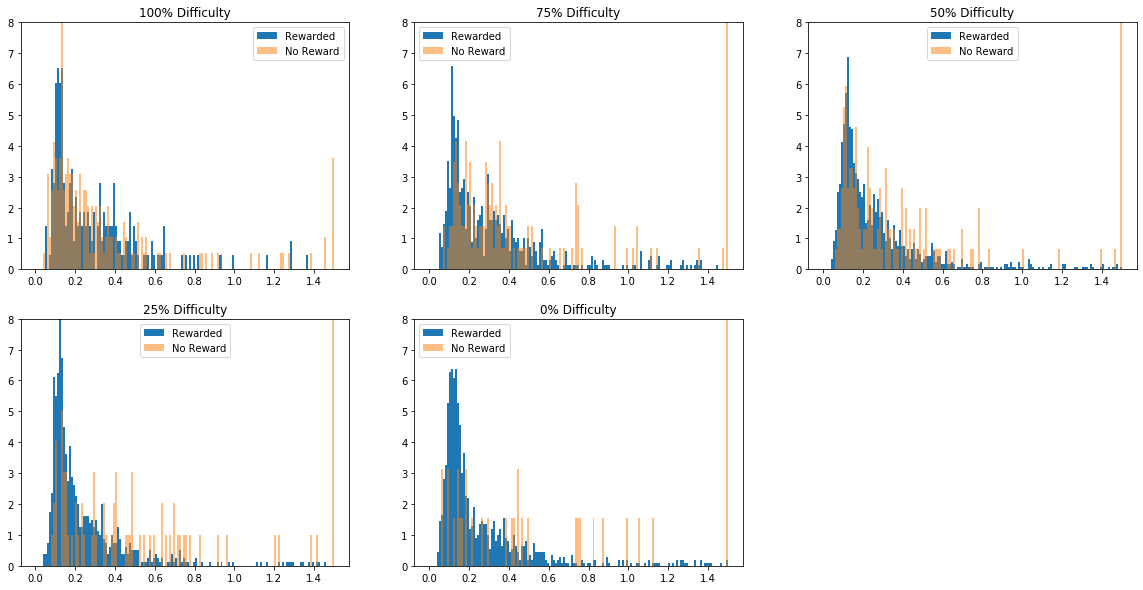

In [12]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(20,10))
plt.hist(dfrew['latency'], bins=150, label='right choice', range=[0, 1.5],density=True)
plt.hist(dfnone['latency'], bins=150, label='wrong choice', range=[0, 1.5],density=True,alpha=.5)
plt.legend()

plt.figure(1,figsize=(20,10))

plt.subplot(2, 3, 1)
plt.hist(diff_100_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_100_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('100% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.subplot(2, 3, 2)
plt.hist(diff_75_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_75_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('75% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.subplot(2, 3, 3)
plt.hist(diff_50_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_50_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('50% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.subplot(2, 3, 4)
plt.hist(diff_25_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_25_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('25% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.subplot(2, 3, 5)
plt.hist(diff_0_rew['latency'], bins=150, label='Rewarded ', range=[0, 1.5],density=True)
plt.hist(diff_0_nope['latency'], bins=150, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
plt.title('0% Difficulty')
plt.legend()
plt.ylim([0,8])
plt.show()

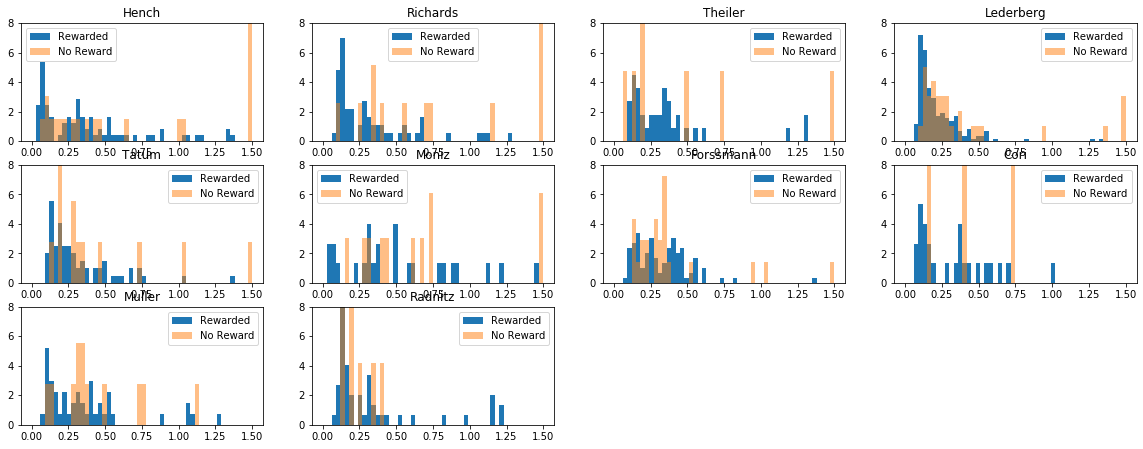

In [31]:
mouse_dict = set(diff_75['mouse_name'])

plt.figure(1,figsize=(20,10))
for idx, name in enumerate(mouse_dict):
    # Get Current Mouse
    current_mouse = diff_75[diff_75['mouse_name'] == name]

    # Get Reward and No Reward Values
    dfrew = current_mouse[current_mouse['feedback_type'] == 1]
    dfnone = current_mouse[current_mouse['feedback_type'] == -1]
    
    # Plot
    plt.subplot(np.ceil(np.sqrt(len(mouse_dict))), np.ceil(np.sqrt(len(mouse_dict))), idx+1)
    plt.hist(dfrew['latency'], bins=50, label='Rewarded ', range=[0, 1.5],density=True)
    plt.hist(dfnone['latency'], bins=50, label='No Reward', range=[0, 1.5],density=True,alpha=.5)
    plt.title(name)
    plt.legend()
    plt.ylim([0,8])
    

In [55]:
# Get Theiler, who has a bimodal response distribution on rewarded trials
theiler = (diff_75[diff_75['mouse_name'] == 'Theiler'])

# Get Reward Values
theiler_rew = theiler[theiler['feedback_type'] == 1]

In [57]:
theiler_rew

,session,mouse_name,trial_type,contrast_right,contrast_left,stim_loc,winning_stim,mouse_resp,ideal_resp,prev_acc,...,contrast_diff,abs_contrast_diff,pres_difficulty,prev_difficulty,gocue_onset,resp_time,latency,feedback_onset,feedback_type,prev_feedback
3,38,Theiler,A,0.25,0.00,-1.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.00,0.437219,0.985264,0.548045,1.022429,1.0,1.0
8,38,Theiler,A,0.25,0.00,-1.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,1.00,0.558628,0.699030,0.140402,0.736231,1.0,1.0
9,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.75,0.758138,1.131284,0.373146,1.167745,1.0,1.0
13,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.25,0.612239,0.881174,0.268936,0.918644,1.0,1.0
15,38,Theiler,A,0.25,0.00,-1.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.50,0.553865,0.821432,0.267568,0.859470,1.0,1.0
16,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.75,0.762876,0.909872,0.146996,0.945279,1.0,1.0
18,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.00,0.732870,1.046969,0.314099,1.082876,1.0,1.0
20,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.50,0.693611,0.975387,0.281776,1.012817,1.0,1.0
31,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.25,0.653401,1.845695,1.192293,1.881822,1.0,1.0
40,38,Theiler,A,0.25,0.00,-1.0,{'right': -1.0},-1.0,-1,1.0,...,-0.25,0.25,0.75,0.50,0.552711,0.676068,0.123357,0.711913,1.0,1.0


In [62]:
# Define modes
theiler_rew['mode'] = 0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
# Split Modes
less_25 = theiler_rew['latency'] < .25
less_50 = theiler_rew['latency'] <= .5
greater_25 = theiler_rew['latency'] >= .25
# print(theiler_rew[less_25])
theiler_rew['mode'][less_25] = 1
theiler_rew['mode'][less_50 & greater_25] = 2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [76]:
theiler_rew

,session,mouse_name,trial_type,contrast_right,contrast_left,stim_loc,winning_stim,mouse_resp,ideal_resp,prev_acc,...,abs_contrast_diff,pres_difficulty,prev_difficulty,gocue_onset,resp_time,latency,feedback_onset,feedback_type,prev_feedback,mode
3,38,Theiler,A,0.25,0.00,-1.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.00,0.437219,0.985264,0.548045,1.022429,1.0,1.0,0
8,38,Theiler,A,0.25,0.00,-1.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,1.00,0.558628,0.699030,0.140402,0.736231,1.0,1.0,1
9,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.75,0.758138,1.131284,0.373146,1.167745,1.0,1.0,2
13,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.25,0.612239,0.881174,0.268936,0.918644,1.0,1.0,2
15,38,Theiler,A,0.25,0.00,-1.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.50,0.553865,0.821432,0.267568,0.859470,1.0,1.0,2
16,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.75,0.762876,0.909872,0.146996,0.945279,1.0,1.0,1
18,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.00,0.732870,1.046969,0.314099,1.082876,1.0,1.0,2
20,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.50,0.693611,0.975387,0.281776,1.012817,1.0,1.0,2
31,38,Theiler,C,0.50,0.25,2.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.25,0.653401,1.845695,1.192293,1.881822,1.0,1.0,0
40,38,Theiler,A,0.25,0.00,-1.0,{'right': -1.0},-1.0,-1,1.0,...,0.25,0.75,0.50,0.552711,0.676068,0.123357,0.711913,1.0,1.0,1


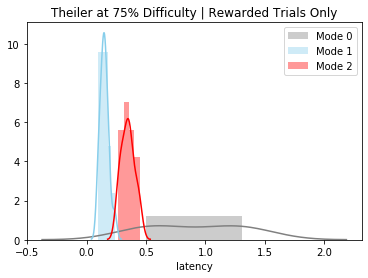

In [81]:
import seaborn as sns
sns.distplot(theiler_rew[theiler_rew["mode"]==0]["latency"], color="gray", label="Mode 0",norm_hist=True)
sns.distplot(theiler_rew[theiler_rew["mode"]==1]["latency"], color="skyblue", label="Mode 1",norm_hist=True)
sns.distplot(theiler_rew[theiler_rew["mode"]==2]["latency"], color="red", label="Mode 2",norm_hist=True)
plt.title('Theiler at 75% Difficulty | Rewarded Trials Only')
plt.legend()
plt.show()